In [12]:
#Tutorial followed from Netsec Explained for guidance. https://www.youtube.com/watch?v=ce2F_FHE4xs&t=285s
#Importing libraries, Scikit-learn functions and models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [13]:
#Reading dataset
url_df = pd.read_csv('tempData.csv')
test_url = url_df['url'][4] #testURL


In [14]:
#Printing data
print(url_df)

                                  url label
0                  patnacovidhelp.com   bad
1                  covid19doctors.com   bad
2               thecovid-19isover.com   bad
3                 e-quarantinepass.ga   bad
4      covid-19vaccinationpassport.eu   bad
...                               ...   ...
2995  youtube.com/watch?v=p4RkJPIlooM  good
2996  youtube.com/watch?v=p4Z13wmZlsU  good
2997  youtube.com/watch?v=p5QJmyaPWdk  good
2998  youtube.com/watch?v=p5ax6iTn8to  good
2999  youtube.com/watch?v=p5fNNp8aPh0  good

[3000 rows x 2 columns]


In [15]:
#Splitting data into train and test sets in 80:20 ratio
train_df, test_df = train_test_split(url_df, test_size=0.2, random_state=42)
labels = train_df['label']
test_labels = test_df['label']

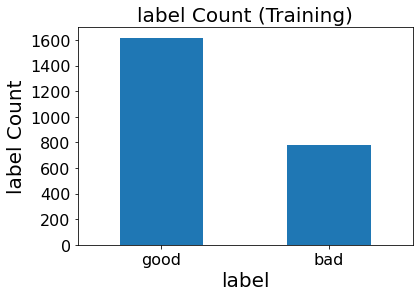

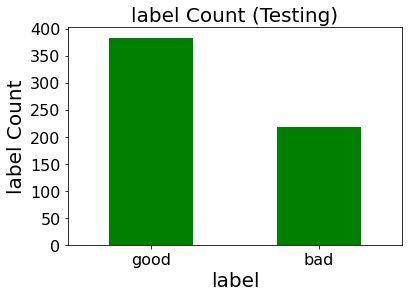

In [16]:
# Graphs showing training and testing set splits. 
count_train_classes = pd.value_counts(train_df['label'])
count_train_classes.plot(kind='bar', fontsize=16)
plt.title("label Count (Training)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("label", fontsize=20)
plt.ylabel("label Count", fontsize=20)

plt.show()

count_test_classes = pd.value_counts(test_df['label'])
count_test_classes.plot(kind='bar', fontsize=16, colormap='ocean')
plt.title("label Count (Testing)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("label", fontsize=20)
plt.ylabel("label Count", fontsize=20)

plt.show()

In [17]:
# PreProcessing: Tokenizer to separate the raw data into tokenized words returned as a list of strings
def tokenizer(url):
  # Splitting by slash (/) and dash (-) in URL
  tokens = re.split('[/-]', url)
  for i in tokens:
    # Splitting domains, subdomains and extension for dots (.)
    if i.find(".") >= 0:
      dot_split = i.split('.')
      # Removing .com and www. as they are common features of a standard URL
      if "com" in dot_split:
        dot_split.remove("com")
      if "www" in dot_split:
        dot_split.remove("www")
      tokens += dot_split
      
  return tokens

In [18]:
# Testing
#Printing URL before tokenization
print(test_url)

# Printing tokenized URL
tokenized_url = tokenizer(test_url)
print(tokenized_url)

covid-19vaccinationpassport.eu
['covid', '19vaccinationpassport.eu', '19vaccinationpassport', 'eu']


In [19]:
#Vectorizer for training set and testing set input
tfidfVec = TfidfVectorizer(tokenizer=tokenizer)
X = tfidfVec.fit_transform(train_df['url'])
test_X = tfidfVec.transform(test_df['url'])

In [20]:
# Report Generator Function (from https://www.youtube.com/watch?v=ce2F_FHE4xs&t=285s)
# Creates and displays graphs for Confusion Matrix, score of the model and classification report
def generate_report(cmatrix, score, creport):

  # Transform cmatrix because Sklearn has pred as columns and actual as rows.
  cmatrix = cmatrix.T
  
  # Generate confusion matrix heatmap
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix, 
              annot=True, 
              fmt="d", 
              linewidths=.5, 
              square = True, 
              cmap = 'Blues', 
              annot_kws={"size": 16}, 
              xticklabels=['bad', 'good'],
              yticklabels=['bad', 'good'])

  plt.xticks(rotation='horizontal', fontsize=16)
  plt.yticks(rotation='horizontal', fontsize=16)
  plt.xlabel('Actual Label', size=20);
  plt.ylabel('Predicted Label', size=20);

  title = 'Accuracy Score: {0:.4f}'.format(score)
  plt.title(title, size = 20);

  # Display classification report and confusion matrix
  print(creport)
  plt.show()

              precision    recall  f1-score   support

         bad       0.97      0.95      0.96       217
        good       0.97      0.98      0.98       383

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



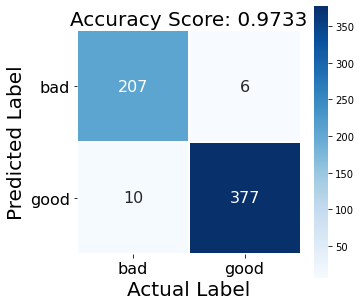

In [22]:
# Logistic Regression with TF-IDF

# Train the model
lgr = LogisticRegression(random_state=0)
lgr.fit(tfidf_X, labels)


# Test score, predictions, confusion matrix, classification report
score_lgr = lgr.score(test_X, test_labels)
predictions_lgr = lgr.predict(test_X)
cmatrix_lgr = confusion_matrix(test_labels, predictions_lgr)
creport_lgr = classification_report(test_labels, predictions_lgr)
generate_report(cmatrix_lgr, score_lgr, creport_lgr)